In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Set the working directory
working_dir = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords"
os.chdir(working_dir)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Snords


In [17]:
# Load the Peak.csv file
peak_df = pd.read_csv('./Peak.csv')

# Display the first few rows to verify the data
# Remove the first row from the dataframe
peak_df = peak_df.iloc[1:]

# Display the first few rows to verify the data
peak_df.head()

,Row.names,seqnames,start,end,width,annotation,geneChr,geneStart,geneEnd,geneLength,...,SYMBOL,GENENAME,ASE1,ASE2,GeneID,Ctrl.bam,V5.bam,difference,FC,L2FC
1,chr2:74154059-74154316,chr2,74154059.0,74154316.0,258.0,3' UTR,2.0,74148079.0,74151952.0,3874.0,...,BOLA3-DT,BOLA3 divergent transcript,NaN,NaN,controlledV5_peak_575,0,31,31,31.0,4.95419631
2,chr17:21198291-21198758,chr17,21198291.0,21198758.0,468.0,3' UTR,17.0,21184385.0,21193265.0,8881.0,...,DHRS7B,dehydrogenase/reductase 7B,NaN,NaN,controlledV5_peak_423,0,20,20,20.0,4.321928095
3,chr17:744815-745029,chr17,744815.0,745029.0,215.0,3' UTR,17.0,747844.0,752038.0,4195.0,...,GEMIN4,gem nuclear organelle associated protein 4,NaN,NaN,controlledV5_peak_403,0,18,18,18.0,4.169925001
4,chr10:27134830-27135032,chr10,27134830.0,27135032.0,203.0,Promoter (1-2kb),10.0,27123547.0,27136337.0,12791.0,...,YME1L1,YME1 like 1 ATPase,NaN,NaN,controlledV5_peak_142,0,17,17,17.0,4.087462841
5,chr12:122603021-122603245,chr12,122603021.0,122603245.0,225.0,Promoter (<=1kb),12.0,122602823.0,122604997.0,2175.0,...,KNTC1,kinetochore associated 1,NaN,NaN,controlledV5_peak_271,0,17,17,17.0,4.087462841


In [29]:
# Remove all rows with negative L2FC
peak_df = peak_df[peak_df['L2FC'] >= 0]

In [37]:
print(peak_df.shape)

(1127, 24)


In [99]:
selected = ["GEMIN4", "YME1L1", "VCP", "DARS1", "POLR2A", "ORAI1", "POLRMT", "CBX2", "NSD2", "TLE1", "CACNG1", "ZMYND11", "DCAF5", "MED25", "SEMA6A-AS2", "POLD3", "RFT1", "SETDB1", "POLE", "CHD4", "POLR2C", "HTT", "MED14", "PER3", "TOR3A", "EEF1A2", "IL33", "SETD5", "GNRH1", "POLR2E", "IGF1R", "IGF2R", "MTMR1", "EEF2", "RBPMS", "EIF2S3B", "NIPBL", "VCP"]



In [86]:
# Sort the DataFrame by L2FC values
sorted_df = peak_df.sort_values('L2FC', ascending=False)

# Select top 20 genes by absolute L2FC for better readability in some plots
sorted_df_20 = sorted_df.iloc[:20]

# Select top 50 genes by absolute L2FC for better readability in some plots
sorted_df_50 = sorted_df.iloc[:50]

# Select top 150 genes by absolute L2FC for better readability in some plots
sorted_df_150 = sorted_df.iloc[:150]


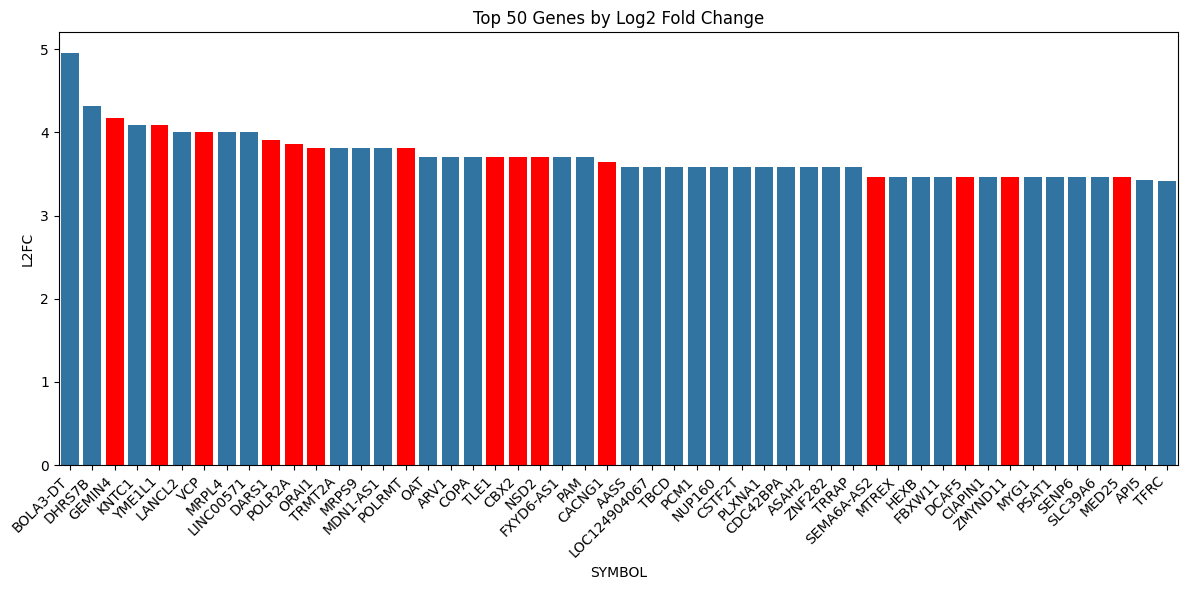

In [102]:
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='SYMBOL', y='L2FC', data=sorted_df_50)
plt.title('Top 50 Genes by Log2 Fold Change')
plt.xticks(rotation=45, ha='right')

# Color bars in red if their symbol is in the selected list
for i, bar in enumerate(bars.patches):
    if sorted_df_50.iloc[i]['SYMBOL'] in selected:
        bar.set_facecolor('red')

plt.tight_layout()
plt.show()

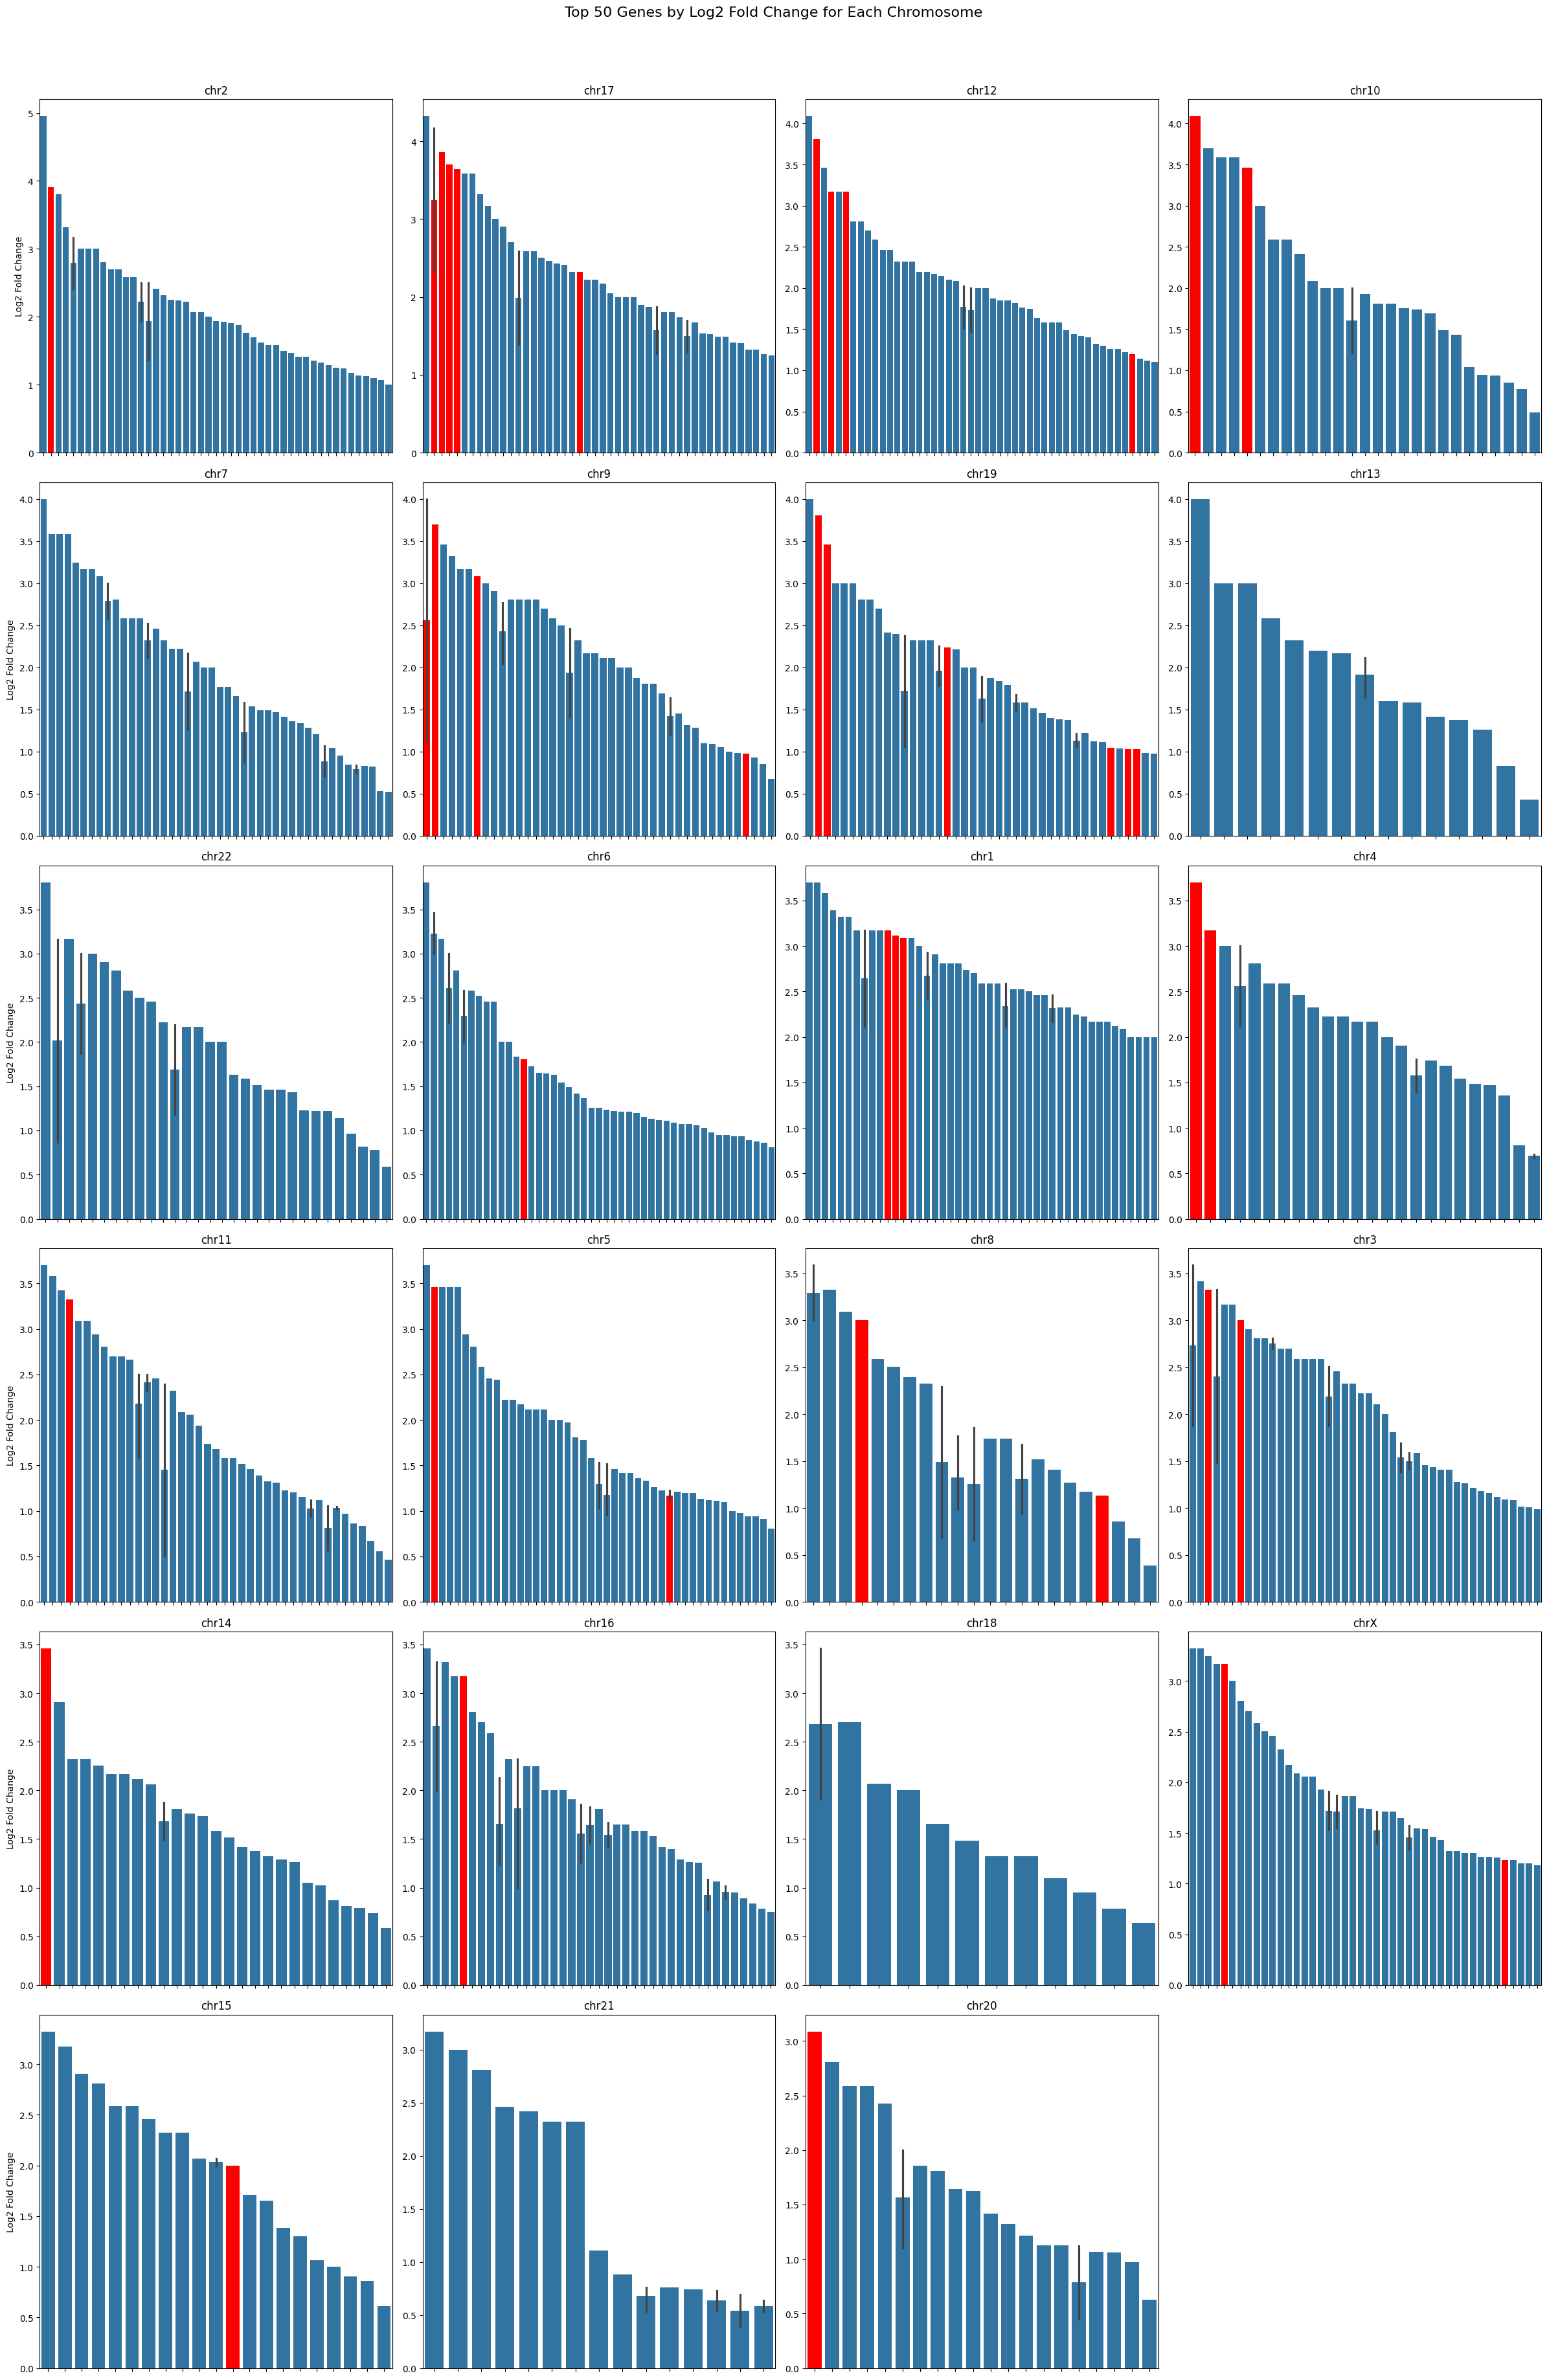

In [100]:
# Create a figure with subplots (6 rows, 4 columns)
fig, axes = plt.subplots(6, 4, figsize=(24, 36))
fig.suptitle('Top 50 Genes by Log2 Fold Change for Each Chromosome', fontsize=16, y=1.02)

# Flatten the axes array for easier iteration
axes = axes.flatten()

chromosomes = ['chr2', 'chr17', 'chr12', 'chr10', 'chr7', 'chr9', 'chr19',
       'chr13', 'chr22', 'chr6', 'chr1', 'chr4', 'chr11', 'chr5', 'chr8',
       'chr3', 'chr14', 'chr16', 'chr18', 'chrX', 'chr15', 'chr21', 'chr20']

for idx, seqname in enumerate(chromosomes):
    # Filter data for the current seqname
    seqname_df = sorted_df[sorted_df['seqnames'] == seqname].head(50)
    
    # Create subplot
    bars = sns.barplot(x='SYMBOL', y='L2FC', data=seqname_df, ax=axes[idx])
    
    # Color bars in red if their symbol is in the selected list
    for i, bar in enumerate(bars.patches):
        if seqname_df.iloc[i]['SYMBOL'] in selected:
            bar.set_facecolor('red')
    
    axes[idx].set_title(f'{seqname}')
    axes[idx].set_xticklabels([])  # Remove x-axis labels for better readability
    axes[idx].set_xlabel('')  # Remove x-axis label
    
    if idx % 4 == 0:  # Only set y-label for leftmost subplots
        axes[idx].set_ylabel('Log2 Fold Change')
    else:
        axes[idx].set_ylabel('')

# Remove any unused subplots
for idx in range(len(chromosomes), 24):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

In [103]:
def plot_l2fc_distribution(sorted_df, n_top=5, selected=None):
    plt.figure(figsize=(16, 8)) 

    # Plot all points
    sns.scatterplot(x=range(len(sorted_df)), y='L2FC', data=sorted_df, color='gray', alpha=0.5)

    # Highlight selected points in green
    if selected is not None:
        selected_df = sorted_df[sorted_df['SYMBOL'].isin(selected)]
        sns.scatterplot(x=selected_df.index, y='L2FC', data=selected_df, color='green', s=50)

    # Highlight top n_top points
    top_n = sorted_df.head(n_top)
    sns.scatterplot(x=top_n.index, y='L2FC', data=top_n, color='red', s=100)

    # Add labels for top n_top points with improved positioning
    label_offset_y = 0.2  # Vertical offset between labels
    label_offset_x = 50   # Horizontal offset for labels

    for i, (idx, row) in enumerate(top_n.iterrows()):
        x = idx
        y = row['L2FC']
        label = row['SYMBOL']
        
        # Calculate vertical and horizontal position for the label
        y_offset = label_offset_y * (n_top - i)  # (i - n_top // 2) * label_offset_y
        if y_offset > 0.4:
            y_offset = 0.4
        x_offset = label_offset_x * (-1 if i % 2 == 0 else 1)  # Alternate left and right
        
        plt.annotate(label, (x, y), 
                     xytext=(x + x_offset, y + y_offset), 
                     textcoords='data',
                     ha='left' if x_offset > 0 else 'right', va='center',
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.7),
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.1'))

    plt.title(f'Log2 Fold Change Distribution with Top {n_top} Highlighted', fontsize=16)
    plt.xlabel('Gene Index', fontsize=12)
    plt.ylabel('Log2 Fold Change', fontsize=12)

    # Ensure L2FC values are numeric and remove any non-numeric values
    sorted_df['L2FC'] = pd.to_numeric(sorted_df['L2FC'], errors='coerce')
    min_l2fc = np.floor(sorted_df['L2FC'].min())
    max_l2fc = np.ceil(sorted_df['L2FC'].max())

    # Calculate appropriate y-ticks
    y_ticks = np.linspace(min_l2fc, max_l2fc, 6)
    plt.yticks(y_ticks)

    # Improve x-axis
    plt.xlim(-50, len(sorted_df) + 50)  # Add some padding
    x_ticks = np.linspace(0, len(sorted_df), 5, dtype=int)
    plt.xticks(x_ticks, x_ticks)

    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.tight_layout()
    plt.show()

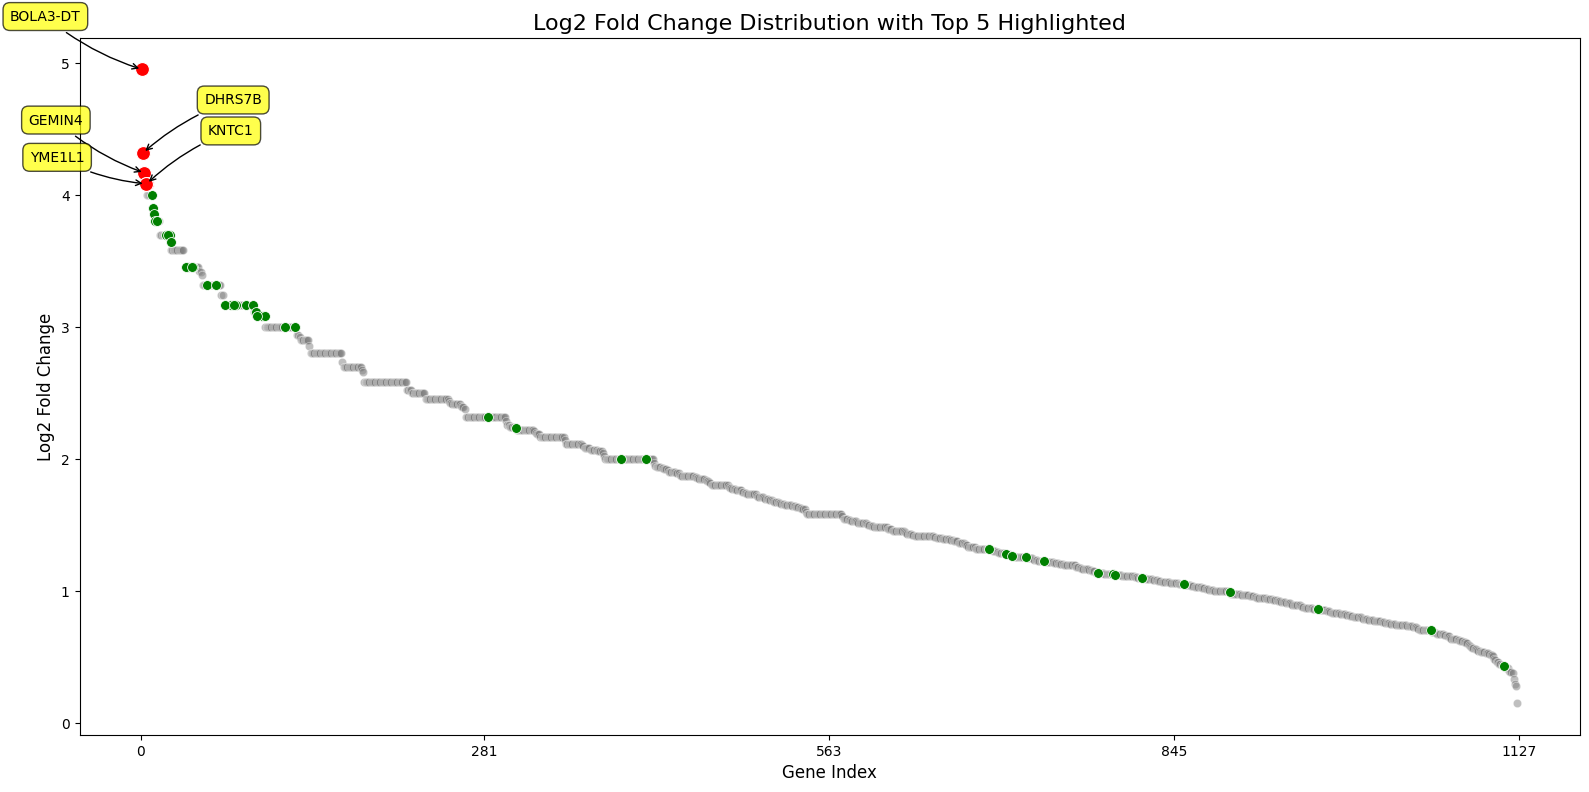

In [104]:
plot_l2fc_distribution(sorted_df, n_top=5, selected=selected)

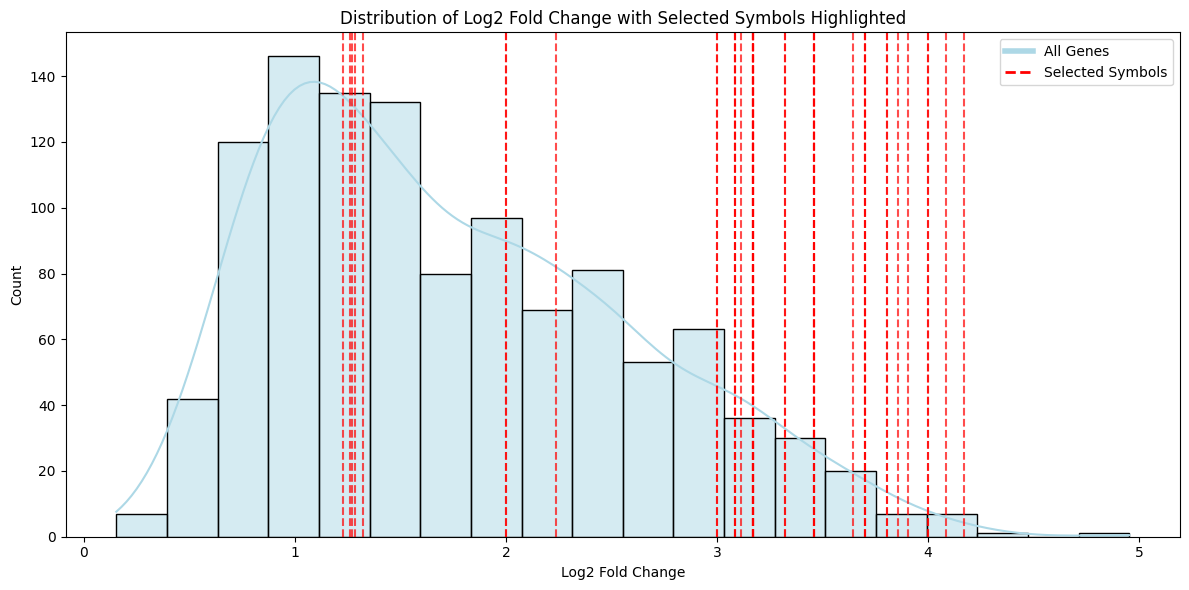

In [108]:
from matplotlib.lines import Line2D

plt.figure(figsize=(12, 6))

# Create the main histogram
sns.histplot(data=sorted_df, x='L2FC', kde=True, color='lightblue', edgecolor='black')

# Highlight the selected symbols
for symbol in selected:
    l2fc = sorted_df[sorted_df['SYMBOL'] == symbol]['L2FC'].values[0]
    plt.axvline(x=l2fc, color='red', linestyle='--', alpha=0.7)
    # plt.text(l2fc, plt.gca().get_ylim()[1], symbol, rotation=90, va='top', ha='right', color='red')

plt.title('Distribution of Log2 Fold Change with Selected Symbols Highlighted')
plt.xlabel('Log2 Fold Change')
plt.ylabel('Count')

# Add a legend
custom_lines = [Line2D([0], [0], color='lightblue', lw=4),
                Line2D([0], [0], color='red', linestyle='--', lw=2)]
plt.legend(custom_lines, ['All Genes', 'Selected Symbols'])

plt.tight_layout()
plt.show()